In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("NetflixOriginals.csv",encoding="ISO-8859-1")

In [5]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [6]:
data.shape

(584, 6)

**Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.**

In [7]:
max_runtime = data.nlargest(70,'Runtime')
max_runtime.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese


In [8]:
import plotly.express as px
xbar =px.bar(max_runtime, x='Runtime', y='Language', color='Title', orientation='h', width=800, height=600)
xbar = xbar.update_layout(showlegend=False)
xbar.show()

**2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.**

In [9]:
data['Premiere']


0         August 5, 2019
1        August 21, 2020
2      December 26, 2019
3       January 19, 2018
4       October 30, 2020
             ...        
579    December 31, 2018
580      October 9, 2015
581    December 16, 2018
582     December 8, 2020
583      October 4, 2020
Name: Premiere, Length: 584, dtype: object

In [10]:
data['Premiere'] = pd.to_datetime(data['Premiere'])
dataframeTarih = data[(data['Premiere'] > '2019-01-01') & (data['Premiere'] <= '2020-06-30')]
dataframeTarih = dataframeTarih[(dataframeTarih['Genre'] == "Documentary")]
dataframeTarih.head()


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English


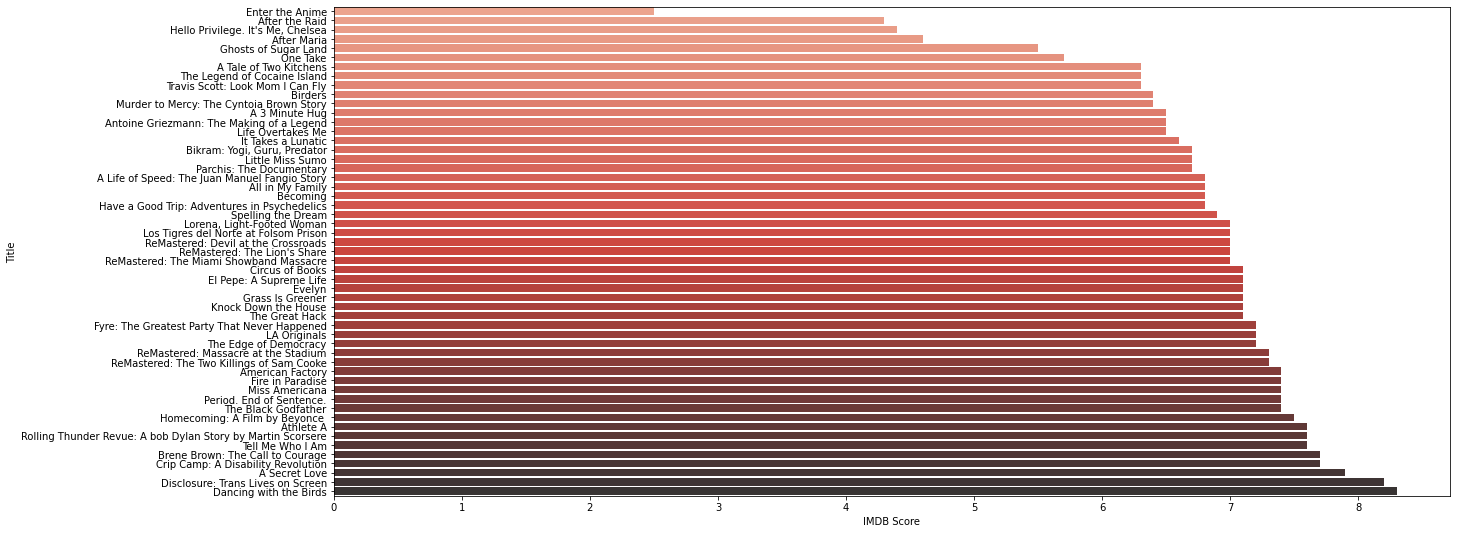

In [11]:
plt.figure(figsize = (20,9))
sns.barplot(x = 'IMDB Score', y = 'Title', data = dataframeTarih,  palette="Reds_d", color = 'red')

**İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?**

In [12]:
ing = data[data['Language']=='English']

In [13]:
ing.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
8,Paradox,Musical/Western/Fantasy,2018-03-23,73,3.9,English
10,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
14,Mercy,Thriller,2016-11-22,90,4.2,English


In [14]:
max_imdb = ing.nlargest(10,'IMDB Score')
max_imdb.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English


In [ ]:
max_imdb= ing.nlargest(1,'IMDB Score')
print(max_imdb['Genre'])

**'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?**

In [16]:
hindi = data[data['Language']=='Hindi']

In [17]:
hindi.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
5,Drive,Action,2019-11-01,147,3.5,Hindi
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi
16,Ghost Stories,Horror anthology,2020-01-01,144,4.3,Hindi
23,The Girl on the Train,Thriller,2021-02-26,120,4.4,Hindi


In [18]:
ort_runtime = hindi['Runtime'].mean()

In [19]:
ort_runtime

115.78787878787878

**'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.**

115 kategoriye sahiptir


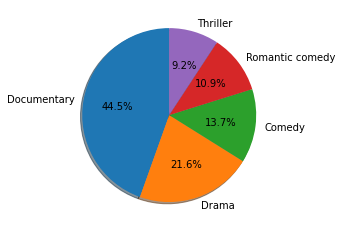

In [20]:
print(len(data['Genre'].value_counts()),"kategoriye sahiptir")
max_Genre = data["Genre"].value_counts().head(5)
plt.pie(max_Genre, labels=max_Genre.index,shadow=True, startangle=90,autopct='%1.1f%%')
plt.show()

**Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.**

In [21]:
max_Language = data["Language"].value_counts().head(3)

In [22]:
max_Language

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

**IMDB puanı en yüksek olan ilk 10 film hangileridir?**

In [23]:
max_imdb = data.nlargest(10,'IMDB Score')
print(max_imdb['Title'])

583       David Attenborough: A Life on Our Planet
582      Emicida: AmarElo - It's All For Yesterday
581                        Springsteen on Broadway
578     Ben Platt: Live from Radio City Music Hall
579          Taylor Swift: Reputation Stadium Tour
580    Winter on Fire: Ukraine's Fight for Freedom
576                        Cuba and the Cameraman 
577                         Dancing with the Birds
571                                           13th
572              Disclosure: Trans Lives on Screen
Name: Title, dtype: object


**IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.**

In [24]:
data.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


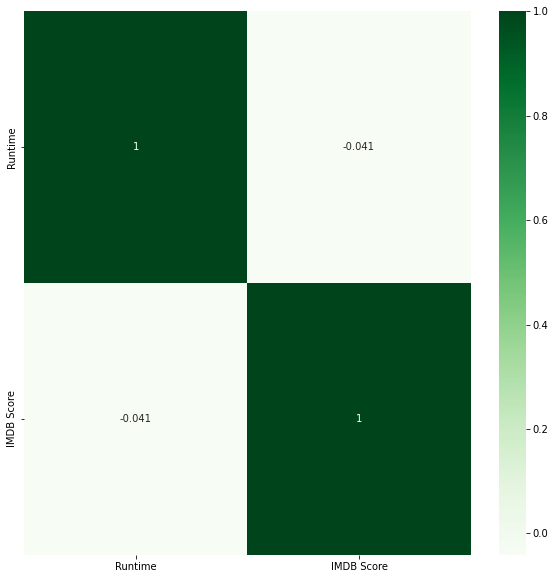

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True, cmap = 'Greens');

**IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.**

In [26]:
max_imdb = data.nlargest(10,'IMDB Score')
max_imdb


,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
571,13th,Documentary,2016-10-07,100,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English


In [27]:
xbarx =px.bar(max_imdb, x='IMDB Score', y='Genre', color='Title', orientation='h', width=800, height=600)
xbarx = xbarx.update_layout(showlegend=False)
xbarx.show()

**'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.**

In [28]:
max_runtime = data.nlargest(10,'Runtime')
max_runtime


,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
247,Citation,Drama,2020-11-06,151,6.2,English
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
509,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
543,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
5,Drive,Action,2019-11-01,147,3.5,Hindi


In [29]:
xbarx =px.bar(max_runtime, x='Runtime', y='Title', orientation='h', width=800, height=600)
xbarx = xbarx.update_layout(showlegend=False)
xbarx.show()

**Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.**

In [30]:
dataframeTarih = pd.to_datetime(data['Premiere'], errors='coerce')
dataYil = dataframeTarih.dt.year.value_counts()
dataYil

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Premiere, dtype: int64

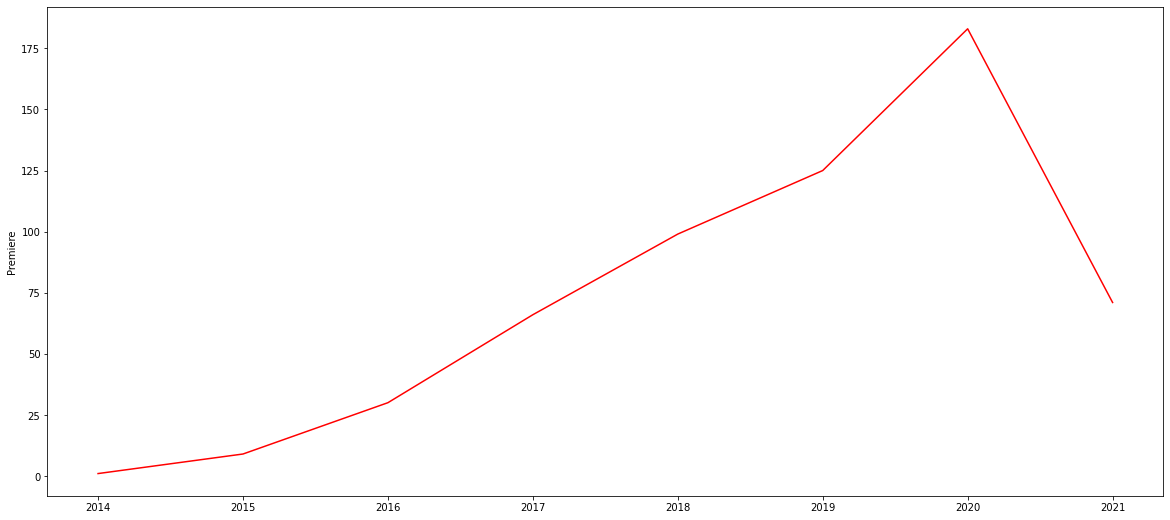

In [31]:
plt.figure(figsize = (20,9))
sns.lineplot(data = dataYil, color = 'red')

**Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.**

In [32]:
ort_imdb = data.groupby(['Language'])[['IMDB Score']].mean().reset_index()
ort_imdb
min_imdb = ort_imdb.nsmallest(10,'IMDB Score')
min_imdb



,Language,IMDB Score
24,Malay,4.200000
6,English/Japanese,4.400000
14,Filipino,5.100000
26,Norwegian,5.100000
27,Polish,5.166667
35,Thai,5.450000
33,Swedish,5.500000
20,Italian,5.542857
30,Spanish/Basque,5.600000
17,German,5.640000


In [33]:
xbarx =px.bar(min_imdb, x='Language', y='IMDB Score', orientation='v', width=800, height=600)
xbarx = xbarx.update_layout(showlegend=False)
xbarx.show()

**Hangi yılın toplam "runtime" süresi en fazladır?**

In [34]:
dataframeToplamRuntime = data[['Runtime', 'Premiere']]
dataframeToplamRuntime['Premiere'] = pd.to_datetime(dataframeToplamRuntime['Premiere'])
dataframeToplamRuntime = dataframeToplamRuntime.groupby(dataframeToplamRuntime['Premiere'].dt.year).sum()
dataframeToplamRuntime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Runtime
Premiere,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


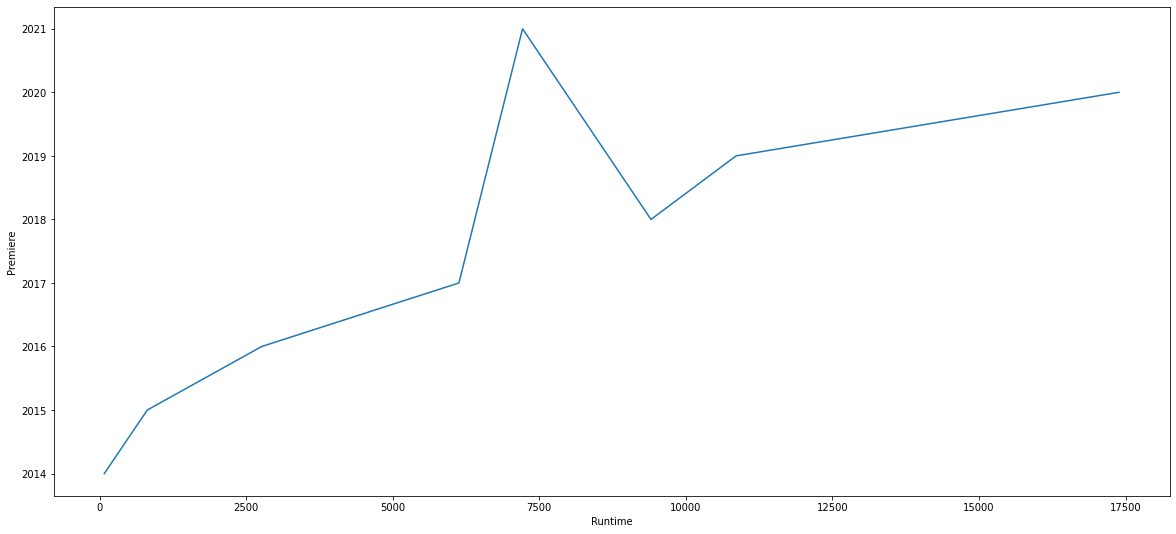

In [35]:
plt.figure(figsize = (20,9))
sns.lineplot(x = 'Runtime', y = 'Premiere', data = dataframeToplamRuntime, palette="Reds_d")

**Her bir dilin en fazla kullanıldığı "Genre" nedir?**

In [36]:
max_genre = data.groupby(['Language'])[['Genre']].max().reset_index()
max_genre


,Language,Genre
0,Bengali,Documentary
1,Dutch,Romantic comedy
2,English,Zombie/Heist
3,English/Akan,War drama
4,English/Arabic,Documentary
5,English/Hindi,Documentary
6,English/Japanese,Documentary
7,English/Korean,Action-adventure
8,English/Mandarin,Documentary
9,English/Russian,Documentary


**Veri setinde outlier veri var mıdır? Açıklayınız.**

In [37]:
df = data.copy()
df = df.select_dtypes(include = ['float64', 'int64'])
df.head()

,Runtime,IMDB Score
0,58,2.5
1,81,2.6
2,79,2.6
3,94,3.2
4,90,3.4


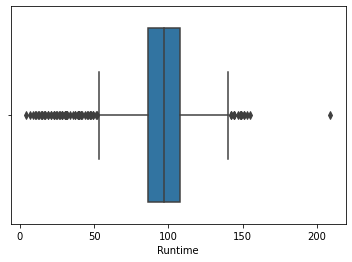

In [38]:
df_table = df["Runtime"].copy()
sns.boxplot(x = df_table)
# 50 ye kadar olan çizgide noktalar bulunmaktadır, bunlar diğer gözlem kutusuna dahil 
# edilmediğinden yani çeyreklerin yakınında hiçbir yerde bulunmadığından aykırı değerlerdir. Grafiğe baktığımızda, 
# veri noktalarının çoğunun 90–110 arasında olduğunu söyleyebiliriz, ancak soldaki noktalar popülasyondan uzakta olan aykırı noktalardır.

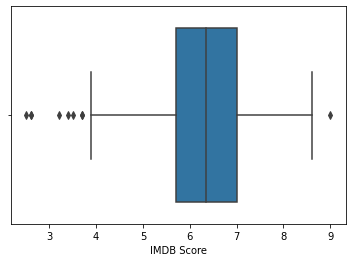

In [39]:
df_table = df["IMDB Score"].copy()
sns.boxplot(x = df_table)
# 4 e kadar olan çizgide noktalar bulunmaktadır, bunlar diğer gözlem kutusuna dahil 
# edilmediğinden yani çeyreklerin yakınında hiçbir yerde bulunmadığından aykırı değerlerdir. Grafiğe baktığımızda, 
# veri noktalarının çoğunun 5.6–7 arasında olduğunu söyleyebiliriz, ancak soldaki noktalar popülasyondan uzakta olan aykırı noktalardır.